# Weibel instability


This notebook shows a demonstration of the Weibel (electromagnetic filamentation) instability in the collision of neutral electron/positron plasma clouds. In this example we collide two neutral electron / positron plasma clouds, moving out of the simulation plane with opposing generalized velocities of $u_3 = \pm 0.6 \mathrm{c}$. All simulation species have the same thermal velocity $u_{th} = 0.1 \mathrm{c}$ in all directions.

In [1]:
import em2d as zpic

eup = zpic.Species( "electrons up", -1.0, ppc = [2,2],
                          ufl = [0.0,0.0,0.6], uth = [0.1,0.1,0.1] )
pup = zpic.Species( "positrons up", +1.0, ppc = [2,2], 
                          ufl = [0.0,0.0,0.6], uth = [0.1,0.1,0.1] )
edown = zpic.Species( "electrons down", -1.0, ppc = [2,2],
                          ufl = [0.0,0.0,-0.6], uth = [0.1,0.1,0.1] )
pdown = zpic.Species( "positrons down", +1.0, ppc = [2,2], 
                          ufl = [0.0,0.0,-0.6], uth = [0.1,0.1,0.1] )

dt = 0.07

sim = zpic.Simulation( nx = [128,128], box = [12.8,12.8], dt = dt, 
                       species = [eup,pup,edown,pdown] )


We want to look at the energy evolution, so we run a customized loop to store field energy at every iteration:

In [2]:
import numpy as np

tmax = 15

niter = int(tmax / dt) + 1

Bperp = np.zeros(niter)
norm = 0.5 * sim.emf.nx[0] * sim.emf.nx[1]

print("\nRunning simulation up to t = {:g} ...".format(tmax))
while sim.t < tmax:
    print('n = {:d}, t = {:g}'.format(sim.n,sim.t), end = '\r')
    
    # Get energy in perpendicular B field components
    Bperp[sim.n] = np.sum(sim.emf.Bx**2+sim.emf.By**2) * norm
    sim.iter()

print("\nDone.")



Running simulation up to t = 15 ...
n = 214, t = 14.98
Done.


## Current filamentation

The Weibel instability will lead to current filamentation, as shown below:

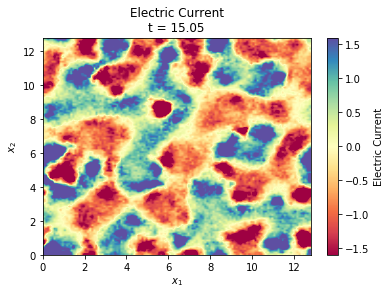

In [3]:
import matplotlib.pyplot as plt

J3 = sim.current.Jz

range = [[0,sim.box[0]],[0,sim.box[1]]]


plt.imshow( J3, interpolation = 'bilinear', origin = 'lower',
          extent = ( range[0][0], range[0][1], range[1][0], range[1][1] ),
          aspect = 'auto', cmap = 'Spectral',clim = (-1.6,1.6))

plt.colorbar().set_label('Electric Current')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Electric Current\nt = {:g}".format(sim.t))

plt.show()

## Evolution of magnetic field energy

The instability will cause a transfer of energy betweem the kinetica energy in the particles and the transverse magnetic field. For this simulaiton, the instability saturates around $t \simeq 8 \,\, \omega_n^{-1}$:

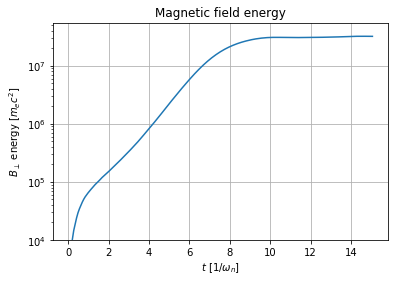

In [4]:
import matplotlib.pyplot as plt

plt.plot(np.linspace(0, sim.t, num = sim.n),Bperp)
plt.yscale('log')
plt.ylim(ymin=1e4)
plt.grid(True)
plt.xlabel("$t$ [$1/\omega_n$]")
plt.ylabel("$B_{\perp}$ energy [$m_e c^2$]")
plt.title("Magnetic field energy")
plt.show()

## Magnetic Field structure

The plots below show the structure of the magnetic field at the end of the simulation. The magnetic field structres act as a buffer separating regions of opposite electric current:

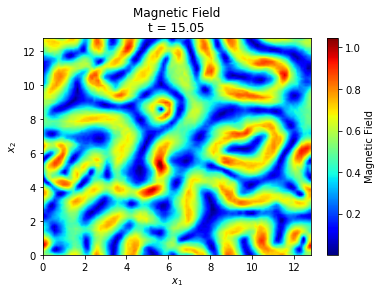

In [5]:
import matplotlib.pyplot as plt
import numpy as np

Bperp = np.sqrt( sim.emf.Bx**2 + sim.emf.By**2 )

range = [[0,sim.box[0]],[0,sim.box[1]]]

plt.imshow( Bperp, interpolation = 'bilinear', origin = 'lower',
          extent = ( range[0][0], range[0][1], range[1][0], range[1][1] ),
          aspect = 'auto', cmap = 'jet')

plt.colorbar().set_label('Magnetic Field')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Magnetic Field\nt = {:g}".format(sim.t))

plt.show()

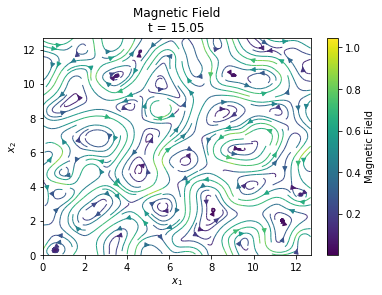

In [6]:
y,x = np.mgrid[ 0:sim.nx[1],0:sim.nx[0] ]
y = y*(sim.box[1]/sim.nx[1])
x = x*(sim.box[0]/sim.nx[0])

plt.streamplot( x,y,sim.emf.Bx, sim.emf.By, linewidth = 1.0, density = 1.5, 
               color = Bperp, cmap = 'viridis' )

plt.colorbar().set_label('Magnetic Field')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Magnetic Field\nt = {:g}".format(sim.t))

plt.show()

## Charge Density

We present the charge density for both the up moving (positive) and down moving (negative) positron species. This is made possible by the fact that these do not overlap.

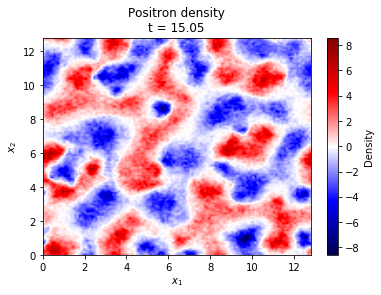

In [7]:
import matplotlib.pyplot as plt


range = [[0,sim.box[0]],[0,sim.box[1]]]

plt.imshow( pup.charge() - pdown.charge(), interpolation = 'bilinear', origin = 'lower',
          extent = ( range[0][0], range[0][1], range[1][0], range[1][1] ),
          aspect = 'auto', cmap = 'seismic',clim = (-8.6,8.6))

plt.colorbar().set_label('Density')

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Positron density\nt = {:g}".format(sim.t))

plt.show()